<a href="https://colab.research.google.com/github/HARIKUMAR44/AI-Ignition-system/blob/master/Internship_Project_by_Hari_Kumar_N_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Understanding

### Import Data

In [8]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [9]:
#Import packages and read data
bank = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

### Missing Values

In [10]:
# No missing data
print(bank.info())

# No duplicated data
print(sum(bank.duplicated()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
0


### Data Description & Distribution

In [11]:
#First few rows of data
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [12]:
#number of columns and rows
bank.shape

(5000, 14)

In [13]:
#List all the column names
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [14]:
#Descriptive statistics for numeric attributes
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [15]:
# Binary categories: target variable personal loan, also securities account, CD account, online banking and credit card. 
# Counts of both classes in binary variables

## Personal loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
print(bank['Personal Loan'].value_counts(dropna = False))

## Securities Account - Does the customer have a securities account with the bank?
print(bank['Securities Account'].value_counts(dropna = False))

## CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
print(bank['CD Account'].value_counts(dropna = False))

## Online - Does the customer use internet banking facilities?
print(bank['Online'].value_counts(dropna = False))

## Credit Card - Does the customer use a credit card issued by UniversalBank?
print(bank['CreditCard'].value_counts(dropna = False))

0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


In [83]:
# Interval categories: experience, age, income, CC avg and mortgage.

## Experience - Year of experience (negative values!!!)
print(bank.loc[bank.Experience < 0].head())
print(len(bank[bank.Experience < 0]))    # 52 negative

## Age - 
#bank.Age.plot('hist')
#plt.title("Age")
#plt.show()

## Income - Annual income in dollars (which income, what the scale is?)
#bank.Income.plot('hist')
#plt.title("Income")
#plt.show()

## CCAvg - Average credit card spending
#bank['CCAvg'].plot('hist')
#plt.title("CCAvg")
#plt.show()

## Mortgage - Value of House Mortgage
#bank['Mortgage'].plot('hist')
#plt.title("Mortgage")
#plt.show()

Empty DataFrame
Columns: [Age, Experience, Income, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard, Area]
Index: []
0


In [21]:
# Ordinal categories: family and education

# Family (mostly 1)
print(bank['Family'].value_counts())

# Education - Education level of the customer (mostly 1)
print(bank['Education'].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64


In [22]:
# Counts for target variable
## Personal loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
print(bank['Personal Loan'].value_counts(dropna = False))

0    4520
1     480
Name: Personal Loan, dtype: int64


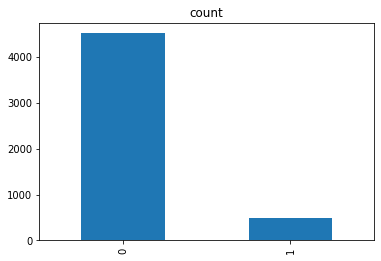

In [23]:
# Bar plot visualizing two classes in the target variable
count = bank["Personal Loan"].value_counts()
count.plot(kind = "bar", title = "count")

## Data Preparation

### Deal with Negative Values

In [24]:
# Deal with negative values in Experience
## Replace with the median experience from people having the same age
bank_Age = bank[bank.Experience >= 0].groupby('Age').Experience.median().to_frame('Experience Median').reindex()
bank = pd.merge(bank, bank_Age, on = "Age", how = "left")

# Round up the value to an integer
bank.loc[bank.Experience < 0, 'Experience'] = np.round(bank['Experience Median'])

# 23 years old == null
## Since no one in the dataset aged 23 had reported accurate experience, and based on that of 22 and 24, we replace negative values with 0.
bank.loc[bank.Experience.isnull(), 'Experience'] = 0

### Categorized Categorical Values

In [25]:
# ZIP Code
bank['ZIP Code'] = bank['ZIP Code'].astype(str)
bank['Area'] = bank['ZIP Code'].str.slice(0, 3)
bank['Area'] = bank['Area'].astype('category')
bank['ZIP Code'] = bank['ZIP Code'].astype('category')

In [26]:
# Education, Family
bank['Education'] = bank['Education'].astype('category')
bank['Family'] = bank['Family'].astype('category')

In [27]:
# Show all the data types
bank.dtypes

ID                       int64
Age                      int64
Experience             float64
Income                   int64
ZIP Code              category
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
Experience Median      float64
Area                  category
dtype: object

### Correlation

In [28]:
# Drop unnecessary columns in order to plot the correlation plot.
bank.drop(['ID', 'Experience Median', 'ZIP Code'],  inplace=True, axis=1)

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994214,-0.055269,-0.052012,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994214,1.000000,-0.046880,-0.050030,-0.010950,-0.008060,-0.001258,0.009905,0.013765,0.009073
Income,-0.055269,-0.046880,1.000000,0.645984,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
CCAvg,-0.052012,-0.050030,0.645984,1.000000,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Mortgage,-0.012539,-0.010950,0.206806,0.109905,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008060,0.502462,0.366889,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001258,-0.002616,0.015086,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.009905,0.169738,0.136534,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644
Online,0.013702,0.013765,0.014206,-0.003611,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210
CreditCard,0.007681,0.009073,-0.002385,-0.006689,-0.007231,0.002802,-0.015028,0.278644,0.004210,1.000000


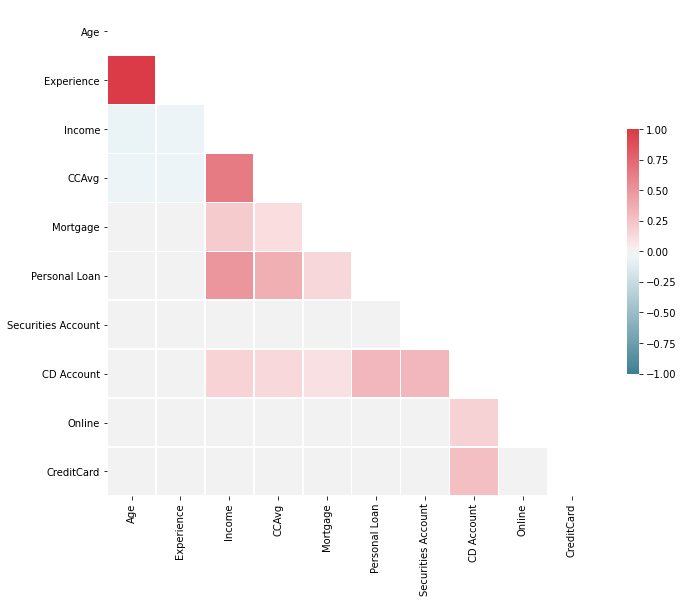

In [29]:
corr = bank.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr

### Dummy Variables

In [30]:
# Family
## Family has 4 levels, and we create 3 dummy variables

familydummy = pd.get_dummies(bank['Family'], prefix='Family')
bank_family = pd.concat([bank, familydummy], axis=1)      
bank_family.drop(['Family_4'], inplace=True, axis=1)

In [31]:
# Education
## Education has 3 levels, and we create 2 dummy variables

edudummy =  pd.get_dummies(bank_family['Education'], prefix='Education')
bank_edu = pd.concat([bank_family, edudummy], axis=1)      
bank_edu.drop(['Education_3'], inplace=True, axis=1)

### Describe Cleaned Dataset

In [32]:
# Total numbers of rows and columns
bank_edu.shape

(5000, 18)

In [33]:
# Descriptive statistics of the cleaned dataset
bank_edu.describe()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Education_1,Education_2
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.12640,73.774200,1.937938,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,0.294400,0.259200,0.202000,0.419200,0.280600
std,11.463166,11.42918,46.033729,1.747659,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,0.455818,0.438239,0.401532,0.493478,0.449337
min,23.000000,0.00000,8.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.00000,39.000000,0.700000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.00000,64.000000,1.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,30.00000,98.000000,2.500000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,67.000000,43.00000,224.000000,10.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# List all the column names
list(bank_edu.columns.values)

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'Area',
 'Family_1',
 'Family_2',
 'Family_3',
 'Education_1',
 'Education_2']

### Define Variables

In [35]:
# We define two x here
## x is used for KNN and Logistic Regression. This model contains dummy variables.
## xtree is used for decision tree. This model treated Family and Education as categorical variables. 
##  Targe variable is 'Personal Loan'

x = bank_edu[['Age',
 'Income',
 'CCAvg',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'Family_1',
 'Family_2',
 'Family_3',
 'Education_1',
 'Education_2']]

xtree = bank_edu[[ 'Age',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'Area']]

y = bank_edu["Personal Loan"]

### Train/Test Data Split

In [36]:
# Split Data for KNN and Logistic Regression

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0, stratify = y)
x_train.describe()

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Education_1,Education_2
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.00000,3500.000000
mean,45.153143,73.515143,1.944043,55.966000,0.101714,0.058286,0.587143,0.299429,0.295143,0.256857,0.207143,0.42800,0.272286
std,11.468384,45.934519,1.756195,101.737513,0.302315,0.234316,0.492418,0.458073,0.456172,0.436962,0.405317,0.49486,0.445200
min,23.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,35.000000,39.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,45.000000,64.000000,1.550000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,55.000000,98.000000,2.600000,100.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000
max,67.000000,224.000000,10.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [37]:
# Split data for decision tree

xtree_train, xtree_test, y_train, y_test = train_test_split(xtree, y, test_size=0.30, random_state=0, stratify = y)
xtree_train.describe()

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.153143,73.515143,1.944043,55.966000,0.101714,0.058286,0.587143,0.299429
std,11.468384,45.934519,1.756195,101.737513,0.302315,0.234316,0.492418,0.458073
min,23.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,64.000000,1.550000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,98.000000,2.600000,100.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,10.000000,635.000000,1.000000,1.000000,1.000000,1.000000


## Modeling & Evaluation (Pre-Resample)

### Decision Tree

In [84]:
# Use GridSearch to find the best decision tree parameters, and fit the training data to apply to test data

from sklearn import tree
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier 

gstree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid= [{"criterion": ["gini", "entropy"],'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50],"max_features": list(range(1, 11)),'min_samples_leaf':[1,2,3,4,5],'min_samples_split':[2,3,4,5]}],cv = 10,n_jobs = 4,scoring='accuracy')
gstree_fit = gstree.fit(xtree_train, y_train)
y_pred_tree = gstree_fit.predict(xtree_test)


## best parameter
print(gstree.best_params_)

## best estimator
print("Tree parameters: \n", gstree_fit.best_estimator_)

## best score
print("Best score: ", gstree.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gstree.score(xtree_train, y_train))

## The overall accuracy on the test set:
print("Test accuracy: ", gstree.score(xtree_test, y_test))

KeyboardInterrupt: ignored

In [39]:
# Generalization Performance of decision tree on test data

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

accuracy = sum(y_pred_tree == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
print(classification_report(y_test, y_pred_tree))

# Confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_tree), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1'])
print("The Confusion matrix: \n", cnf_matrix)

NameError: ignored

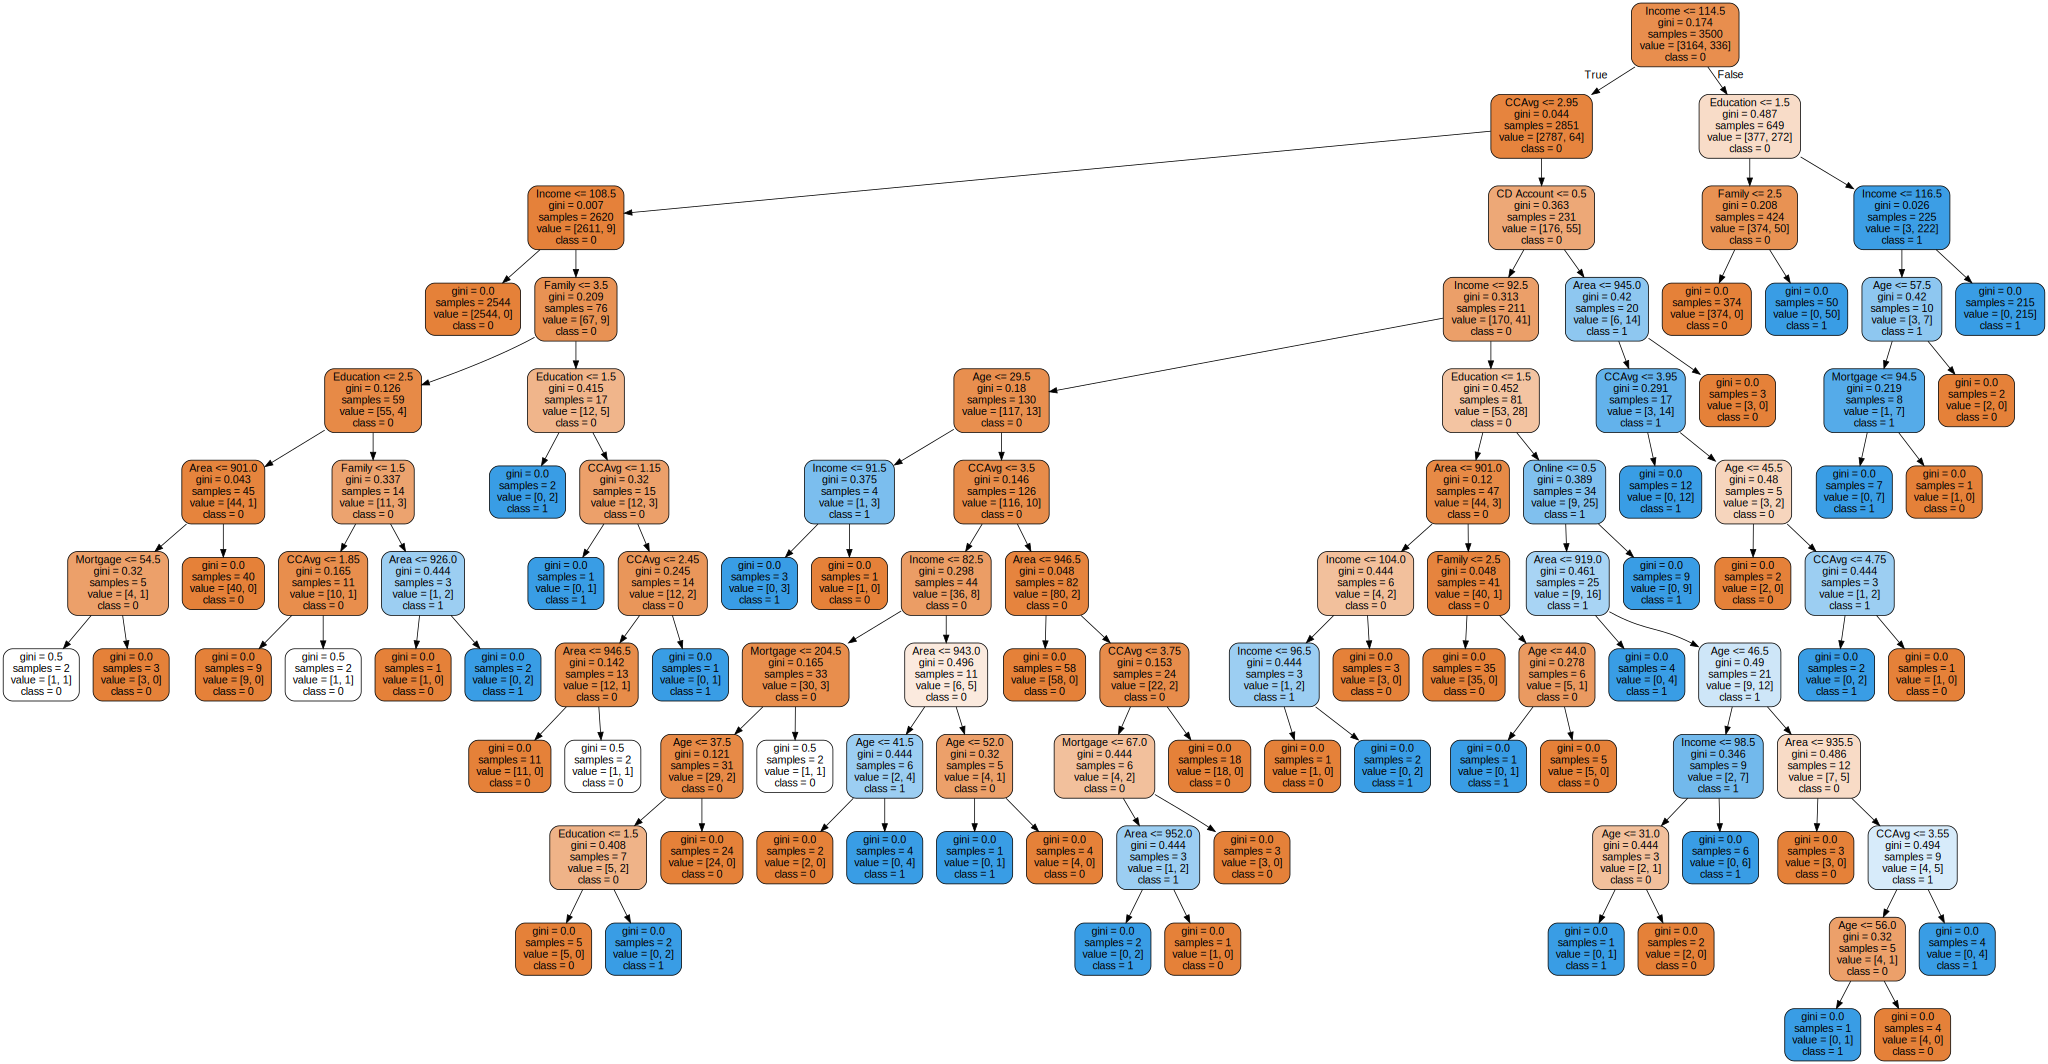

In [42]:
# Graph for the best decision tree model

from sklearn import tree
import graphviz 
from sklearn.tree import export_graphviz

model =  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')
model = model.fit(xtree_train, y_train)

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names = [ 'Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 
                                                 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Area'],
                                class_names = ['0','1'],
                                filled = True, 
                                rounded = True)
                                                   
graph = graphviz.Source(dot_data) 
graph

In [43]:
#Cross Validation score for decision tree

from sklearn.model_selection import cross_val_score

scores_tree=cross_val_score(gstree, xtree_train, y_train, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_tree), np.std(scores_tree)))

NameError: ignored

### KNN

In [52]:
# Standardize for x (both training and test data)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
x_std = sc.transform(x)

In [53]:
# Use GridSearch to find the best KNN parameters, and fit the training data to apply to test data.

from sklearn import neighbors, datasets
from sklearn.model_selection import GridSearchCV 

gsknn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                               'weights':['uniform','distance']}],
                  scoring='accuracy',
                  cv=10,
                  n_jobs=4)

gsknn_fit = gsknn.fit(x_train_std, y_train)          
y_pred_knn = gsknn_fit.predict(x_test_std)

## best parameter
print(gsknn.best_params_)

## best estimator
print("KNN parameters: \n", gsknn_fit.best_estimator_)

## best score
print("Best score: ", gsknn.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gsknn.score(x_train_std, y_train))

## The overall accuracy on the test set:
print("Test accuracy: ", gsknn.score(x_test_std, y_test))

{'n_neighbors': 1, 'weights': 'uniform'}
KNN parameters: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
Best score:  0.9588571428571427
Training score:  1.0
Test accuracy:  0.966


In [54]:
# Generalization Performance of KNN on test data

accuracy = sum(y_pred_knn == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
print(classification_report(y_test, y_pred_knn))

# Confusion matrix
cnf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_knn), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1'])
print("The Confusion matrix: \n", cnf_matrix)

The predictive accuracy is:  0.97
The classification error is:  0.03
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1356
           1       0.87      0.76      0.81       144

    accuracy                           0.97      1500
   macro avg       0.92      0.88      0.90      1500
weighted avg       0.96      0.97      0.97      1500



NameError: ignored

In [55]:
# Cross Validation score for KNN model

scores_knn =cross_val_score(gsknn, x_train_std, y_train, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_knn), np.std(scores_knn)))

CV accuracy: 0.958 +/- 0.011


### Logistic Regression

In [ ]:
# Use GridSearch to find the best logistic regression parameters, and fit the training data to apply to test data.

from sklearn.linear_model import LogisticRegression 

gslr = GridSearchCV(estimator=LogisticRegression(random_state=0),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2']}],
                  scoring='accuracy',
                  cv=10)

gslr_fit = gslr.fit(x_train, y_train)          
y_pred_lr = gslr_fit.predict(x_test)

## best parameter
print(gslr.best_params_)

## best estimator
print("Logistic parameters: \n", gslr_fit.best_estimator_)

## best score
print("Best score: ", gslr.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gslr.score(x_train, y_train))

## The overall accuracy on the test set:
print("Test accuracy: ", gslr.score(x_test, y_test))

In [57]:
# Generalization Performance of logistic regression on test data

accuracy = sum(y_pred_lr == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
print(classification_report(y_test, y_pred_lr))

# Confusion matrix

cnf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_lr), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1'])
print("The Confusion matrix: \n", cnf_matrix)

The predictive accuracy is:  0.96
The classification error is:  0.04
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.85      0.67      0.75       144

    accuracy                           0.96      1500
   macro avg       0.91      0.83      0.86      1500
weighted avg       0.95      0.96      0.95      1500



NameError: ignored

In [58]:
# Cross validation performance for logistic regression 

scores_lr =cross_val_score(gslr, x_train, y_train, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_lr),np.std(scores_knn)))

CV accuracy: 0.960 +/- 0.011


### ROC Graph

10-fold cross validation:

ROC AUC: 0.95 (+/- 0.02) [Decision tree]
ROC AUC: 0.83 (+/- 0.05) [KNN]
ROC AUC: 0.96 (+/- 0.02) [Logistic regression]


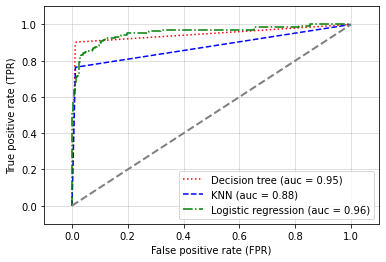

In [59]:
# ROC graph containing roc curve for decision tree, KNN, and logistic regression models

np.random.seed(0)
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

## Decision Tree Classifier
clf1 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

## kNN Classifier
clf2 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Logistic Regression Classifier
clf3 = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Label the classifiers
clf_labels = ['Decision tree',  'KNN', 'Logistic regression',]
all_clf = [clf1, clf2, clf3]

print('10-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers 
    if clf == clf1:
        scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=xtree_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')

    elif clf == clf2:
        scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=x_train_std,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')

    else:
        scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=x_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" #Print peformance statistics based on cross-validation
      % (scores.mean(), scores.std(), label))

colors = ['red', 'blue', 'green']      #Colors for visualization
linestyles = [':', '--', '-.', '-']        #Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1 and data is normalized
    if clf == clf1:
        y_pred = clf.fit(xtree_train,
                         y_train).predict_proba(xtree_test)[:, 1] # Make predictions based on the classifiers
        
    elif clf == clf2:
        y_pred = clf.fit(x_train_std,
                         y_train).predict_proba(x_test_std)[:, 1] # Make predictions based on the classifiers
        
    else:
        y_pred = clf.fit(x_train,
                         y_train).predict_proba(x_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

## Modling & Evalutaion (Resampling)

### Resampling

In [62]:
# The dataset is imbalanced, we resample the rare class to the same amount of the larger class to get 50%:50% ratio.
# We only resample for the training dataset, excluding test data

from sklearn.utils import resample

## resample for KNN and logistic regression
x_train_resampled, y_train_resampled = resample(x_train[ y_train == 1],
                                    y_train[y_train == 1],
                                    replace=True, 
                                    n_samples=x_train[y_train == 0].shape[0], 
                                    random_state=0)

xtree_train_resampled, y_train_resampled = resample(xtree_train[y_train == 1],
                                    y_train[y_train == 1],
                                    replace=True, 
                                    n_samples=xtree_train[y_train == 0].shape[0], 
                                    random_state=0)

In [63]:
## resample for decision tree

x_train_zero = x_train[y_train == 0]
x_train_resample = pd.concat([x_train_resampled, x_train_zero])

xtree_train_zero = xtree_train[y_train == 0]
xtree_train_resample = pd.concat([xtree_train_resampled, xtree_train_zero])

y_train_zero = y_train[y_train == 0]
y_train_resample = pd.concat([y_train_resampled, y_train_zero])

### Decision Tree (Resampling)

In [82]:
# Use GridSearch to find the best decision tree parameters after resampling, and fit the training data to apply to test data
from sklearn import tree
#import sklearn.grid_search as gs
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 

gstree_resample = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                                   param_grid= [{"criterion": ["gini", "entropy"],
                                                 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50],
                                                 "max_features": list(range(1, 11)),
                                                 'min_samples_leaf':[1,2,3,4,5],
                                                 'min_samples_split':[2,3,4,5]
                                                }],
                                   cv = 10,
                                   n_jobs = 4,
                                   scoring='accuracy')
gstree_resample_fit = gstree_resample.fit(xtree_train_resample, y_train_resample)
y_pred_tree_resample = gstree_resample_fit.predict(xtree_test)

## best parameter
print(gstree_resample.best_params_)

## best estimator
print("Tree parameters: \n", gstree_resample_fit.best_estimator_)

## best score
print("Best score: ", gstree_resample.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gstree_resample.score(xtree_train_resample, y_train_resample))

## The overall accuracy on the test set:
print("Test accuracy: ", gstree_resample.score(xtree_test, y_test))

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tree parameters: 
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
Best score:  0.9963647589337492
Training score:  1.0
Test accuracy:  0.9793333333333333


In [65]:
tree = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best').fit(xtree_train_resample, y_train_resample)
tree.feature_importances_

array([0.01643771, 0.56408001, 0.12789856, 0.1685135 , 0.1051462 ,
       0.00524273, 0.        , 0.00445837, 0.        , 0.        ,
       0.00822292])

In [66]:
xtree_train_resample.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Area'],
      dtype='object')

In [67]:
feature_importance = pd.DataFrame({'features': list(xtree_train_resample.columns), 'importance': list(tree.feature_importances_)})

Text(0, 0.5, 'Importance')

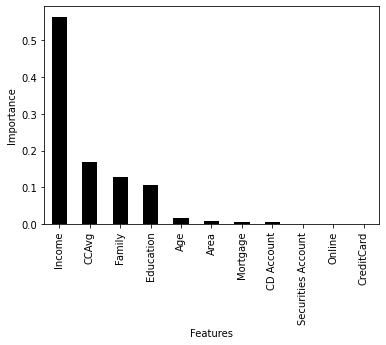

In [68]:
tmp = feature_importance.sort_values('importance', ascending = False)
tmp.plot('features', 'importance', kind = 'bar', color = 'black', legend = None)
plt.xlabel('Features')
plt.ylabel('Importance')

In [69]:
# Generalization Performance of decision tree after resampling on test data

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

accuracy = sum(y_pred_tree_resample == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
print(classification_report(y_test, y_pred_tree_resample))

# Confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_tree_resample), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1'])
print("The Confusion matrix: \n", cnf_matrix)

NameError: ignored

In [70]:
# Where to save the figures
PROJECT_ROOT_DIR = "."

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [71]:
# Graph for the best decision tree model

from sklearn import tree
import graphviz 
from sklearn.tree import export_graphviz

model =  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')
model = model.fit(xtree_train_resample, y_train_resample)

dot_data = tree.export_graphviz(model, out_file=image_path("of_tree.dot"), 
                                feature_names = [ 'Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 
                                                 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Area'],
                                class_names = ['0','1'],
                                filled = True, 
                                rounded = True)
                                                   
graph = graphviz.Source(dot_data) 

FileNotFoundError: ignored

In [72]:
# Converting .dot file to PNG Example: Run command "dot -Tpng of_tree.dot -o of_tree.png" in the terminal after installing graphviz package 
# and making sure you are in the right directory (same directory as the .dot file)
path_png = os.path.join(PROJECT_ROOT_DIR, "images", "of_tree.png")
Image(path_png)

NameError: ignored

In [ ]:
# Cross Validation score for decision tree after resampling 

from sklearn.model_selection import cross_val_score

scores_tree_resample=cross_val_score(gstree, xtree_train_resample, y_train_resample, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_tree_resample), np.std(scores_tree_resample)))

### KNN (Resampling)

In [73]:
# Standardize for all x after resampling

sc.fit(x_train_resample)
x_train_resample_std = sc.transform(x_train_resample)
x_test_std = sc.transform(x_test)

In [74]:
# Use GridSearch to find the best KNN parameters after resampling, and fit the training data to apply to test data

gsknn_resample = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                               'weights':['uniform','distance']}],
                  scoring='accuracy',
                  cv=10,
                  n_jobs=4)

gsknn_resample_fit = gsknn_resample.fit(x_train_resample_std, y_train_resample)          
y_pred_knn_resample = gsknn_resample_fit.predict(x_test_std)

## best parameter
print(gsknn_resample.best_params_)

## best estimator
print("KNN parameters: \n", gsknn_resample_fit.best_estimator_)

## best score
print("Best score: ", gsknn_resample.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gsknn_resample.score(x_train_resample_std, y_train_resample))

## The overall accuracy on the test set:
print("Test accuracy: ", gsknn_resample.score(x_test_std, y_test))

{'n_neighbors': 1, 'weights': 'uniform'}
KNN parameters: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
Best score:  0.9941523186753856
Training score:  1.0
Test accuracy:  0.964


In [75]:
# Generalization Performance of KNN after resampling on test data

accuracy = sum(y_pred_knn_resample == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
print(classification_report(y_test, y_pred_knn_resample))

# Confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_knn_resample), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1'])
print("The Confusion matrix: \n", cnf_matrix)

The predictive accuracy is:  0.96
The classification error is:  0.04
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.87      0.74      0.80       144

    accuracy                           0.96      1500
   macro avg       0.92      0.86      0.89      1500
weighted avg       0.96      0.96      0.96      1500

The Confusion matrix: 
           Predict 0  Predict 1
Actual 0       1340         16
Actual 1         38        106


In [76]:
# Cross validaiton score for KNN after resampling

scores_knn_resample =cross_val_score(gsknn_resample, x_train_resample_std, y_train_resample, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_knn_resample), np.std(scores_knn_resample)))

CV accuracy: 0.994 +/- 0.003


### Logistic Regression (Resampling)

In [77]:
# Use GridSearch to find the best logistic regression parameters after resampling, and fit the training data to apply to test data.

gslr_resample = GridSearchCV(estimator=LogisticRegression(random_state=0),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2']}],
                  scoring='accuracy',
                  cv=10)

gslr_resample_fit = gslr_resample.fit(x_train_resample, y_train_resample)          
y_pred_lr_resample = gslr_resample_fit.predict(x_test)

## best parameter
print(gslr_resample.best_params_)

## best estimator
print("Logistic parameters: \n", gslr_resample_fit.best_estimator_)

## best score
print("Best score: ", gslr_resample.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gslr_resample.score(x_train_resample, y_train_resample))

## The overall accuracy on the test set:
print("Test accuracy: ", gslr_resample.score(x_test, y_test))

{'C': 0.1, 'penalty': 'l2'}
Logistic parameters: 
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Best score:  0.9026581278620993
Training score:  0.9037610619469026
Test accuracy:  0.908


In [78]:
# Generalization Performance of logistic regression after resampling on test data

accuracy = sum(y_pred_lr_resample == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
print(classification_report(y_test, y_pred_lr_resample))

# Confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_lr_resample), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1'])
print("The Confusion matrix: \n", cnf_matrix)

The predictive accuracy is:  0.91
The classification error is:  0.09
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1356
           1       0.51      0.90      0.65       144

    accuracy                           0.91      1500
   macro avg       0.75      0.91      0.80      1500
weighted avg       0.94      0.91      0.92      1500

The Confusion matrix: 
           Predict 0  Predict 1
Actual 0       1232        124
Actual 1         14        130


In [79]:
# Cross validation score for logisitc regression after resampling

scores_lr_resample =cross_val_score(gslr_resample, x_train_resample, y_train_resample, 
                                    scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_lr_resample), np.std(scores_lr_resample)))

CV accuracy: 0.900 +/- 0.010


### ROC Graph (Resampling)

10-fold cross validation:

ROC AUC: 1.00 (+/- 0.00) [Decision tree]
ROC AUC: 0.99 (+/- 0.00) [KNN]
ROC AUC: 0.97 (+/- 0.01) [Logistic regression]


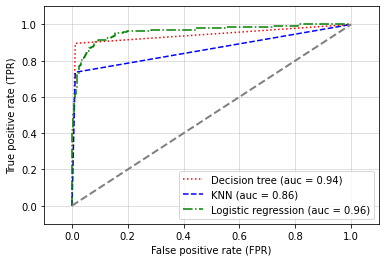

In [80]:
# ROC graph containing roc curve for decision tree, KNN, and logistic regression models after resampling

np.random.seed(0)

## Decision Tree Classifier
clf1_resample = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

## kNN Classifier
clf2_resample = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Logistic Regression Classifier
clf3_resample = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Label the classifiers
clf_labels = ['Decision tree',  'KNN', 'Logistic regression',]
all_clf = [clf1_resample, clf2_resample, clf3_resample]

print('10-fold cross validation:\n')
for clf, label in zip([clf1_resample, clf2_resample, clf3_resample], clf_labels): #For all classifiers 
    if clf == clf1_resample:
        scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=xtree_train_resample,
                             y=y_train_resample,
                             cv=10,
                             scoring='roc_auc')
    elif clf == clf2_resample:
        scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=x_train_resample_std,
                             y=y_train_resample,
                             cv=10,
                             scoring='roc_auc')

    else:
        scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=x_train_resample,
                             y=y_train_resample,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" #Print peformance statistics based on cross-validation
      % (scores.mean(), scores.std(), label))

colors = ['red', 'blue', 'green']      #Colors for visualization
linestyles = [':', '--', '-.', '-']        #Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1 and data is normalized
    if clf == clf1_resample:
        y_pred = clf.fit(xtree_train_resample,
                         y_train_resample).predict_proba(xtree_test)[:, 1] # Make predictions based on the classifiers
        
    elif clf == clf2_resample:
        y_pred = clf.fit(x_train_resample_std,
                         y_train_resample).predict_proba(x_test_std)[:, 1] # Make predictions based on the classifiers

    else:
        y_pred = clf.fit(x_train_resample,
                         y_train_resample).predict_proba(x_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()